# More Newton-Type Methods

## Learning Objectives

After studying this notebook, completing the activities, and asking questions in class, you should be able to:
* Apply Inexact Newton's Method using a finite difference formula.
* Understand and generalize Secant Method.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Inexact Newton

What if we do not know the derivative of the function?  We can do what is called inexact Newton and estimate the derivative using a **finite difference formula**:

$$f'(x_i) \approx \frac{f(x_i + \delta) - f(x_i)}{\delta}$$

which will converge to the derivative as $\delta \rightarrow 0$. Indeed, the limit of this approximation as $\delta \rightarrow 0$ is the definition of a derivative. To implement this we need to only make a small change to the code to estimate the derivative instead of calling a derivative function.  The downside is that we need an extra function evaluation to estimate the derivative.

<div class="admonition seealso"> 
    <p class="title"><b>Home Activity</b></p>
 Finish the function below. Hint: You'll find the formula above helpful.
</div>

In [10]:
def inexact_newton(f,x0,delta = 1.0e-7, epsilon=1.0e-6, LOUD=False,max_iter=50):
    """Find the root of the function f via Newton-Raphson method
    Args:
        f: function to find root of [function]
        x0: initial guess [float]
        delta: finite difference parameter [float]
        epsilon: tolerance [float]
        LOUD: toggle on/off print statements [boolean]
        max_iter: maximum number of iterations [int]
        
    Returns:
        estimate of root [float]
    """
    
    assert callable(f), "Warning: 'f' should be a Python function"
    assert type(x0) is float or type(x0) is int, "Warning: 'x0' should be a float or integer"
    assert type(delta) is float, "Warning: 'delta' should be a float"
    assert type(epsilon) is float, "Warning: 'eps' should be a float"
    assert type(max_iter) is int, "Warning: 'max_iter' should be an integer"
    assert max_iter >= 0, "Warning: 'max_iter' should be non-negative"
    
    x = x0
    if (LOUD):
        print("x0 =",x0)
    iterations = 0
    converged = False
    
    # Check if the residual is close enough to zero
    while (not converged and iterations < max_iter):
        
        # evaluate function 'f' at new 'x'
        fx = f(x)
        
        # calculate 'slope' (hint: use formula above)
        # Add your solution here
        
        if (LOUD):
            print("x_",iterations+1,"=",x,"-",fx,"/",slope,"=",x - fx/slope)
        x = x - fx/slope
        
        iterations += 1
        
        # check if converged
        if np.fabs(f(x)) < epsilon:
            converged = True
            

    print("It took",iterations,"iterations")
    
    if not converged:
        print("Warning: Not a solution. Maximum number of iterations exceeded.")
    return x #return estimate of root

## Unit Test

<div class="admonition seealso"> 
    <p class="title"><b>Home Activity</b></p>
 Now test your code using the unit test below. Then speculate as to how many times your code evaluated the nonlinear function.
</div>

First, run the next cell with the nonlinear function we used in the [previous notebook](../06/Newton-Raphson-Method-in-One-Dimension.ipynb):

In [3]:
def nonlinear_function(x):
    ''' compute a nonlinear function for demonstration
    Arguments:
        x: scalar
    Returns:
        c(x): scalar
    '''
    return 3*x**3 + 2*x**2 - 5*x-20

In [4]:
root = inexact_newton(nonlinear_function,-1.5,delta = 1.0e-7, epsilon=1.0e-6, LOUD=True,max_iter=15)

x0 = -1.5
x_ 1 = -1.5 - -18.125 / 9.249998846883045 = 0.45945970372823863
x_ 2 = 0.45945970372823863 - -21.58411181208517 / -1.2622315992416588 = -16.640501844574604
x_ 3 = -16.640501844574604 - -13206.564357107398 / 2420.594719296787 = -11.184584647108327
x_ 4 = -11.184584647108327 - -3911.2918349345796 / 1076.1160501715494 = -7.54994706846515
x_ 5 = -7.54994706846515 - -1159.3263333064642 / 477.81551529624267 = -5.123641734726272
x_ 6 = -5.123641734726272 - -345.39137036052114 / 210.77077121844923 = -3.4849355309967853
x_ 7 = -3.4849355309967853 - -105.25705162502234 / 90.36323575628558 = -2.320113900340418
x_ 8 = -2.320113900340418 - -35.10059526280932 / 34.16589905214096 = -1.2927563234406585
x_ 9 = -1.2927563234406585 - -16.675217007438032 / 4.869943950325251 = 2.1313522859252334
x_ 10 = 2.1313522859252334 - 7.47460644110005 / 44.40937431127168 = 1.9630408301341777
x_ 11 = 1.9630408301341777 - 0.5857605234894905 / 37.533928995969745 = 1.9474346695440516
x_ 12 = 1.9474346695440516 

Notice that we get the same answer and it took the same number of iterations as `newton` from the [previous notebook](../06/Newton-Raphson-Method-in-One-Dimension.ipynb).

In [5]:
# Removed autograder test. You may delete this cell.

It took 12 iterations


**Discussion Question**: How many times did ``inexact_newton`` evaluate $c(x)$ for the unit test above?

## Secant Method

The secant method is a variation on the theme of Newton's method. In this case we use the previous two guesses to construct the slope:

$$f'(x_i) \approx \frac{f(x_i) - f(x_{i-1})}{x_i - x_{i-1}}.$$ 

The benefit of this is that it **does not require an additional function evaluation**. This will be valuable if it takes a long time to do a function evaluation. One issue is that we need two points to get started.  Therefore, we can use **inexact Newton for the first step** and then **use secant from then on**.  Below is a graphical example.

<div class="admonition note"> 
<p class="title"><b>Class Activity</b></p>
 With a partner, walk through the example below. Flip a figurative coin to decide who is "Partner A" and who is "Partner B".
</div>

## Iteration 1

Inexact Newton Step

Initial Guess = 1.3


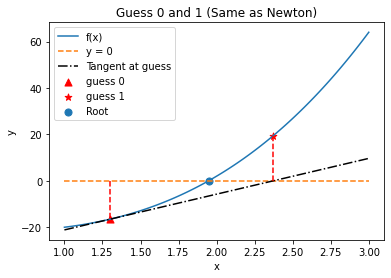

In [6]:
Np = 100
X = np.linspace(1,3,Np)
plt.plot(X,nonlinear_function(X),label="f(x)")
guess = 1.3
print("Initial Guess =",guess)
slope = (nonlinear_function(guess) - nonlinear_function(guess-.0001))/(.0001)
plt.plot(X,0*X,"--",label="y = 0")
plt.plot(X,nonlinear_function(guess) + slope*(X-guess),'k-.', label="Tangent at guess")
plt.plot(np.array([guess,guess]),np.array([0,nonlinear_function(guess)]),'r--')
plt.scatter(guess,nonlinear_function(guess),label="guess 0",c="red", marker="^", s=50)
new_guess = guess-nonlinear_function(guess)/slope
plt.scatter(new_guess,nonlinear_function(new_guess),marker="*",label="guess 1",c="red", s=50)
plt.plot(np.array([new_guess,new_guess]),np.array([0,nonlinear_function(new_guess)]),'r--')
plt.scatter(1.94731,0,label="Root", s=50)
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Guess 0 and 1 (Same as Newton)")
plt.savefig("Secant-Methods1.pdf")
plt.show()

<div class="admonition note"> 
<p class="title"><b>Class Activity</b></p>
 Partner A: Describe in a few sentences the lines and points on the plot. What are the most important features?
</div>

## Iteration 2

Secant Method

Guess 1 = 2.3727105503764285
Guess 2 = 1.7925464201668238


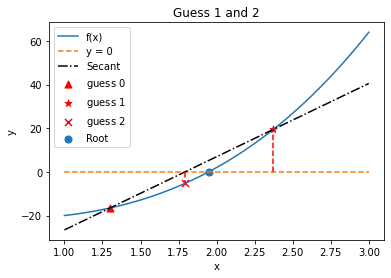

In [7]:
old_guess = guess
guess = new_guess
print("Guess 1 =",guess)
slope = (nonlinear_function(guess)-nonlinear_function(old_guess))/(guess - old_guess)
plt.plot(X,nonlinear_function(X),label="f(x)")
plt.plot(X,0*X,"--",label="y = 0")
plt.plot(X,nonlinear_function(old_guess) + slope*(X-old_guess),'k-.', label="Secant")
plt.plot(np.array([guess,guess]),np.array([0,nonlinear_function(guess)]),'r--')
plt.scatter(old_guess,nonlinear_function(old_guess),label="guess $0$",c="red", marker="^", s=50)
plt.scatter(guess,nonlinear_function(guess),marker="*",label="guess $1$",c="red", s=50)
new_guess = guess-nonlinear_function(guess)/slope
print("Guess 2 =",new_guess)
plt.scatter(new_guess,nonlinear_function(new_guess),marker="x", label="guess $2$",c="red", s=50)
plt.plot(np.array([new_guess,new_guess]),np.array([0,nonlinear_function(new_guess)]),'r--')
plt.scatter(1.94731,0,label="Root", s=50)
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Guess 1 and 2")
plt.savefig("Secant-Methods2.pdf")
plt.show()

<div class="admonition note"> 
<p class="title"><b>Class Activity</b></p>
 Swith roles! Partner B: Describe in a few sentences the lines and points on the plot. What are the most important features?
</div>

## Secant Method Algorithm

We can now generalize the secant method (similar to inexact Newton).

<div class="admonition note"> 
<p class="title"><b>Class Activity</b></p>
 Run the code below.
</div>

In [8]:
def secant(f,x0,delta = 1.0e-7, epsilon=1.0e-6, LOUD=False):
    """Find the root of the function f via Newton-Raphson method
    Args:
        f: function to find root of
        x0: initial guess
        delta: finite difference parameter
        epsilon: tolerance
        
    Returns:
        estimate of root
    """
    x = x0
    if (LOUD):
        print("x0 =",x0)
    
    #first time use inexact Newton
    x_old = x
    fold = f(x_old)
    fx = fold
    slope = (f(x_old+delta) - fold)/delta
    x = x - fold/slope
    if (LOUD):
        print("Inexact Newton\nx_",1,"=",x,"-",fx,"/",slope,"=",
              x - fx/slope,"\nStarting Secant")
    fx = f(x)
    iterations = 1 
    
    # now switch to secant method
    while (np.fabs(fx) > epsilon):
        # recall fx, x correspond with the last point,
        # fold, and x_old correspond to the 2nd to last point
        ### SWITCH ROLES. Discuss this line in depth.
        slope = (fx - fold)/(x - x_old)
        
        # switch the history. overwrite fold with fx, etc.
        fold = fx
        x_old = x
        if (LOUD):
            print("x_",iterations+1,"=",x,"-",fx,"/",slope,"=",x - fx/slope)
        
        # calculate new point
        x = x - fx/slope
        
        # evaluate function f at new point
        fx = f(x)
        iterations += 1
    print("It took",iterations,"iterations")
    return x #return estimate of root

<div class="admonition note"> 
<p class="title"><b>Class Activity</b></p>
 As a class, discuss the output below.
</div>

In [9]:
root = secant(nonlinear_function,-1.5,LOUD=True)

x0 = -1.5
Inexact Newton
x_ 1 = 0.45945970372823863 - -18.125 / 9.249998846883045 = 2.4189194074564773 
Starting Secant
x_ 2 = 0.45945970372823863 - -21.58411181208517 / -1.7653396012704734 = -11.767146325248616
x_ 3 = -11.767146325248616 - -4572.272414110397 / 372.19554564146875 = 0.517451025937337
x_ 4 = 0.517451025937337 - -21.636092826944633 / 370.4343081984803 = 0.5758583935814591
x_ 5 = 0.5758583935814591 - -21.64317999154791 / -0.1213402501968484 = -177.79183045192954
x_ 6 = -177.79183045192954 - -16795875.77015077 / 94164.21906726681 = 0.5760882386351796
x_ 7 = 0.5760882386351796 - -21.643113428270524 / 94164.09772754615 = 0.5763180832782079
x_ 8 = 0.5763180832782079 - -21.643046105986738 / 0.29290342772317585 = 74.46772411503576
x_ 9 = 74.46772411503576 - 1249567.865555407 / 16911.161604699413 = 0.5775978916445297
x_ 10 = 0.5775978916445297 - -21.642657354146493 / 16911.454507939132 = 0.5788776548573265
x_ 11 = 0.5788776548573265 - -21.64224503667768 / 0.32218262307570056 = 67

Secant is not quite as good as Newton (it took an additional iteration), but it does not need to know the derivative. Additionally, as mentioned above, there are fewer function evaluations (per iteration) than inexact Newton.